In [2]:
!nvidia-smi

Tue Jul 16 10:27:50 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!git clone "https://github.com/convman/Multimodal.git"

In [4]:
cd Multimodal/

/content/Multimodal-MOSEI


In [5]:
ls

'cross modal'/   LICENSE                       sentiment/
 data/          'MOSEI baseline results.png'   SOF/
 iemocap/       'multimodal baselines'/       'unimodal baselines'/
'iemocap sdk'/   README.md


In [0]:
!chmod +x data/dataset_download.sh

In [0]:
!./data/dataset_download.sh

In [8]:
import pandas as pd
import numpy as np
import h5py
import torchvision
import torchsummary
from torch.autograd import Variable
import torch
from sklearn.decomposition import PCA
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
import keras
import tensorflow as tf
from time import time
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras import layers
from google.colab import files	
from keras.models import load_model
from keras.models import Model,Sequential,Model
from keras.layers import *
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras import callbacks
from keras.callbacks import *
%matplotlib inline

Using TensorFlow backend.


In [9]:
import pandas as pd
import numpy as np
import h5py

Test_labels_sad = pd.read_csv("mosi2uni_Test_labels_sad.csv",header=None)
Train_labels_sad = pd.read_csv("mosi2uni_Train_labels_sad.csv",header=None)

video_train = h5py.File("video_train.h5","r")
video_train = np.array(video_train.get('d1'))

video_test = h5py.File("video_test.h5","r")
video_test = np.array(video_test.get('d1'))

audio_train = h5py.File("audio_train.h5","r")
audio_train = np.array(audio_train.get('d1'))

audio_test = h5py.File("audio_test.h5","r")
audio_test = np.array(audio_test.get('d1'))

text_train = h5py.File("text_train_emb.h5","r")
text_train = np.array(text_train.get('d1'))

text_test = h5py.File("text_test_emb.h5","r")
text_test = np.array(text_test.get('d1'))


print(video_train.shape, text_train.shape, audio_train.shape)

(15290, 20, 35) (15290, 20, 300) (15290, 20, 74)


In [0]:
Test_labels_fear = pd.read_csv("mosi2uni_Test_labels_fear.csv",header=None)
Train_labels_fear = pd.read_csv("mosi2uni_Train_labels_fear.csv",header=None)

Test_labels_happy = pd.read_csv("mosi2uni_Test_labels_happy.csv",header=None)
Train_labels_happy = pd.read_csv("mosi2uni_Train_labels_happy.csv",header=None)

Test_labels_angry = pd.read_csv("mosi2uni_Test_labels_angry.csv",header=None)
Train_labels_angry = pd.read_csv("mosi2uni_Train_labels_angry.csv",header=None)

Test_labels_surprise = pd.read_csv("mosi2uni_Test_labels_surprise.csv",header=None)
Train_labels_surprise = pd.read_csv("mosi2uni_Train_labels_surprise.csv",header=None)

Test_labels_disgust = pd.read_csv("mosi2uni_Test_labels_disgust.csv",header=None)
Train_labels_disgust = pd.read_csv("mosi2uni_Train_labels_disgust.csv",header=None)

In [0]:
Train_video = torch.from_numpy(video_train).float().cuda()
Train_audio = torch.from_numpy(audio_train).float().cuda()
Train_text = torch.from_numpy(text_train).float().cuda()

In [0]:
class Audio(nn.Module):
    def __init__(self):
        super(Audio,self).__init__()
        self.lstm1 = nn.LSTM(74,256,batch_first=True)
#         self.lstm2 = nn.LSTM(256,256,batch_first=True)
        self.lstm3 = nn.LSTM(256,128,batch_first=True)
#         self.lstm4 = nn.LSTM(128,128,batch_first=True)
        self.lstm5 = nn.LSTM(128,64,batch_first=True)
#         self.lstm6 = nn.LSTM(64,64,batch_first=True)
        self.lstm7 = nn.LSTM(64,32,batch_first=True)
#         self.lstm8 = nn.LSTM(32,32,batch_first=True)
        self.dense = nn.Linear(32,32)
    def forward(self,data):
        x,hc = self.lstm1(data)
#         x,hc = self.lstm2(x)
        x,hc = self.lstm3(x)
#         x,hc = self.lstm4(x)
        x,hc = self.lstm5(x)
#         x,hc = self.lstm6(x)
        x,hc = self.lstm7(x)
#         x,hc = self.lstm8(x)
        h,c = hc
        x = F.relu(self.dense(h.squeeze()))
        x = self.dense(x)
        return x

# model_audio = Audio().cuda()
# print(model_audio)

# inputs = Train_audio.cuda()
# y=model_audio(inputs)
# print(y.size())

In [0]:
class Text(nn.Module):
    def __init__(self):
        super(Text,self).__init__()
        self.lstm1 = nn.LSTM(300,256,batch_first=True)
#         self.lstm2 = nn.LSTM(256,256,batch_first=True)
        self.lstm3 = nn.LSTM(256,128,batch_first=True)
#         self.lstm4 = nn.LSTM(128,128,batch_first=True)
        self.lstm5 = nn.LSTM(128,64,batch_first=True)
#         self.lstm6 = nn.LSTM(64,64,batch_first=True)
        self.lstm7 = nn.LSTM(64,32,batch_first=True)
#         self.lstm8 = nn.LSTM(32,32,batch_first=True)
        self.dense = nn.Linear(32,32)
    def forward(self,data):
        x,hc = self.lstm1(data)
#         x,hc = self.lstm2(x)
        x,hc = self.lstm3(x)
#         x,hc = self.lstm4(x)
        x,hc = self.lstm5(x)
#         x,hc = self.lstm6(x)
        x,hc = self.lstm7(x)
#         x,hc = self.lstm8(x)
        h,c = hc
        x = F.relu(self.dense(h.squeeze()))
        x = self.dense(x)
        return x

# print(model_text)

# inputs = concat_audio.cuda()
# y=model(inputs)
# print(y.size())

In [0]:
class Video(nn.Module):
    def __init__(self):
        super(Video,self).__init__()
        self.lstm1 = nn.LSTM(35,256,batch_first=True)
#         self.lstm2 = nn.LSTM(256,256,batch_first=True)
        self.lstm3 = nn.LSTM(256,128,batch_first=True)
#         self.lstm4 = nn.LSTM(128,128,batch_first=True)
        self.lstm5 = nn.LSTM(128,64,batch_first=True)
#         self.lstm6 = nn.LSTM(64,64,batch_first=True)
        self.lstm7 = nn.LSTM(64,32,batch_first=True)
#         self.lstm8 = nn.LSTM(32,32,batch_first=True)
        self.dense = nn.Linear(32,32)
    def forward(self,data):
        x,hc = self.lstm1(data)
#         x,hc = self.lstm2(x)
        x,hc = self.lstm3(x)
#         x,hc = self.lstm4(x)
        x,hc = self.lstm5(x)
#         x,hc = self.lstm6(x)
        x,hc = self.lstm7(x)
#         x,hc = self.lstm8(x)
        h,c = hc
        x = F.relu(self.dense(h.squeeze()))
        x = self.dense(x)
        return x

# model_video = Video().cuda()
# print(model_video)


In [12]:
!nvidia-smi

Tue Jul 16 10:34:02 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    70W / 149W |    813MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

iteration : 0  loss : 0.8919661045074463
iteration : 100  loss : 4.1097402572631836e-05
iteration : 200  loss : -2.5957822799682617e-05
iteration : 300  loss : 6.338953971862793e-05
iteration : 400  loss : 8.717179298400879e-05
iteration : 500  loss : 7.87973403930664e-05
iteration : 600  loss : 7.25090503692627e-05
iteration : 700  loss : -4.470348358154297e-06
iteration : 800  loss : 2.8371810913085938e-05
iteration : 900  loss : 0.00014838576316833496


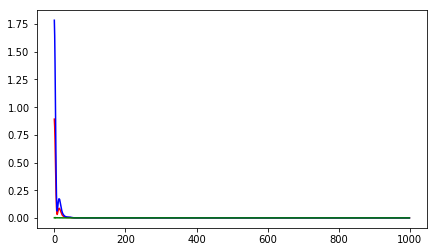

In [73]:
model_text = Text().cuda()
model_video = Video().cuda()

loss = []
cross_modal = []
diversity = []
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
distance = nn.CosineEmbeddingLoss()
iterations = 1000
optimizer_video = torch.optim.SGD(model_video.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)
optimizer_text = torch.optim.SGD(model_text.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)
# optimizer_video = torch.optim.SGD(model_video.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)

for iteration in range(iterations):
    

    i,j = sample(range(0,15290),2)
    
    ai = torch.unsqueeze(Train_video[i],0).cuda()
    aj = torch.unsqueeze(Train_video[j],0).cuda()
    
    ti = torch.unsqueeze(Train_text[i],0).cuda()
    tj = torch.unsqueeze(Train_text[j],0).cuda()
    
    optimizer_video.zero_grad()
    optimizer_text.zero_grad()
    
    xi = model_video(ai)
    xj = model_video(aj)
    
    yi = model_text(ti)
    yj = model_text(tj)
    
    xi = torch.unsqueeze(xi,0)
    xj = torch.unsqueeze(xj,0)
    
    yi = torch.unsqueeze(yi,0)
    yj = torch.unsqueeze(yj,0)

    
    cross_modal_loss1 = distance(xi,yi,torch.ones(1).cuda()) 
    cross_modal_loss2 = distance(xj,yj,torch.ones(1).cuda())
    diversity_loss1 = distance(xi,xj,torch.ones(1).cuda()) 
    diversity_loss2 = distance(yi,yj,torch.ones(1).cuda())
    
    if(Train_labels_sad[i] == Train_labels_sad[j]):
        k = 0.5
    else:
        k = -0.5
    
    total_loss = 0.5*(cross_modal_loss1 + cross_modal_loss2) + k*(diversity_loss1 + diversity_loss2)
    loss.append(total_loss.item())
    cross_modal.append(cross_modal_loss1.item()+cross_modal_loss2.item())
    diversity.append(diversity_loss1.item()+diversity_loss2.item())
    
    total_loss.backward()
    optimizer_video.step()
    optimizer_text.step()
    
    if(iteration%100 == 0):
        print("iteration :",iteration," loss :",total_loss.item())
    
    del ai,aj,ti,tj,xi,xj,yi,yj
    del total_loss,cross_modal_loss1,cross_modal_loss2,diversity_loss1,diversity_loss2
    torch.cuda.empty_cache()
    
    
    
plt.plot(loss,'r',cross_modal,'b',diversity,'g')
plt.show()

In [49]:
print(torch.sum(Train_labels_sad==1),torch.sum(Train_labels_sad==0))
print(torch.sum(Test_labels_sad==1),torch.sum(Test_labels_sad==0),torch.max(torch.sum(Test_labels_sad==1),
                                                                            torch.sum(Test_labels_sad==0)).float().item()/48.32)

tensor(3906, device='cuda:0') tensor(11384, device='cuda:0')
tensor(1334, device='cuda:0') tensor(3498, device='cuda:0') 72.39238410596026


In [48]:
Train_labels_happy = torch.from_numpy(np.array(Train_labels_happy))
Test_labels_happy = torch.from_numpy(np.array(Test_labels_happy))

print(torch.sum(Train_labels_happy==1),torch.sum(Train_labels_happy==0))
print(torch.sum(Test_labels_happy==1),torch.sum(Test_labels_happy==0),
    torch.max(torch.sum(Test_labels_happy==1),torch.sum(Test_labels_happy==0)).float().item()/48.32)

tensor(8147) tensor(7143)
tensor(2522) tensor(2310) 52.193708609271525


In [50]:
Train_labels_angry = torch.from_numpy(np.array(Train_labels_angry))
Test_labels_angry = torch.from_numpy(np.array(Test_labels_angry))

print(torch.sum(Train_labels_angry==1),torch.sum(Train_labels_angry==0))
print(torch.sum(Test_labels_angry==1),torch.sum(Test_labels_angry==0),
    torch.max(torch.sum(Test_labels_angry==1),torch.sum(Test_labels_angry==0)).float().item()/48.32)

tensor(3443) tensor(11847)
tensor(971) tensor(3861) 79.90480132450331


In [51]:
Train_labels_surprise = torch.from_numpy(np.array(Train_labels_surprise))
Test_labels_surprise = torch.from_numpy(np.array(Test_labels_surprise))

print(torch.sum(Train_labels_surprise==1),torch.sum(Train_labels_surprise==0))
print(torch.sum(Test_labels_surprise==1),torch.sum(Test_labels_surprise==0),
    torch.max(torch.sum(Test_labels_surprise==1),torch.sum(Test_labels_surprise==0)).float().item()/48.32)

tensor(1562) tensor(13728)
tensor(479) tensor(4353) 90.08692052980132


In [52]:
Train_labels_disgust = torch.from_numpy(np.array(Train_labels_disgust))
Test_labels_disgust = torch.from_numpy(np.array(Test_labels_disgust))

print(torch.sum(Train_labels_disgust==1),torch.sum(Train_labels_disgust==0))
print(torch.sum(Test_labels_disgust==1),torch.sum(Test_labels_disgust==0),
    torch.max(torch.sum(Test_labels_disgust==1),torch.sum(Test_labels_disgust==0)).float().item()/48.32)

tensor(2720) tensor(12570)
tensor(922) tensor(3910) 80.91887417218543


In [72]:
Train_labels_fear = torch.from_numpy(np.array(Train_labels_fear))
Test_labels_fear = torch.from_numpy(np.array(Test_labels_fear))

print(torch.sum(Train_labels_fear==1),torch.sum(Train_labels_fear==0))
print(torch.sum(Test_labels_fear==1),torch.sum(Test_labels_fear==0),
    torch.max(torch.sum(Test_labels_fear==1),torch.sum(Test_labels_fear==0)).float().item()/48.32)

tensor(1319) tensor(13971)
tensor(332) tensor(4500) 93.12913907284768


In [17]:
!nvidia-smi

Tue Jul 16 10:39:47 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    70W / 149W |    850MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

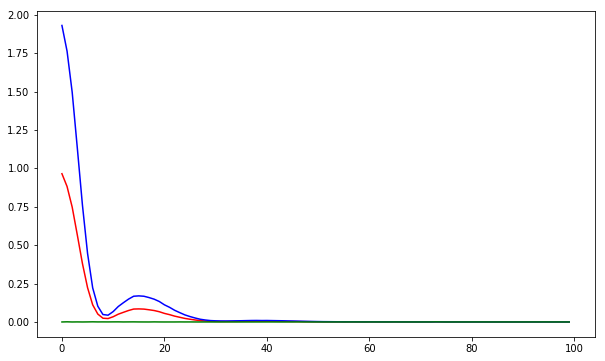

In [68]:
plt.plot(loss[:100],'r',cross_modal[:100],'b',diversity[:100],'g')
plt.show()

In [104]:
Test_labels_sad.shape

torch.Size([4832, 1])

In [0]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier,self).__init__()
        self.dense1 = nn.Linear(32,32)
        self.dense2 = nn.Linear(32,1)
    def forward(self,data):
        x = F.relu(self.dense1(data))
#         x = F.relu(self.dense1(x))
#         x = F.relu(self.dense1(x))
        x = torch.sigmoid(self.dense2(x))
        return x

In [0]:
# Train_labels_sad = torch.from_numpy(np.array(Train_labels_sad)).float().cuda()
# Test_labels_sad = torch.from_numpy(np.array(Test_labels_sad)).float().cuda()

Train_labels_happy = torch.from_numpy(np.array(Train_labels_happy)).float().cuda()
Test_labels_happy = torch.from_numpy(np.array(Test_labels_happy)).float().cuda()


# Test_video = torch.from_numpy(video_test).float().cuda()
# Test_text = torch.from_numpy(text_test).float().cuda()

In [21]:
!nvidia-smi

Tue Jul 16 10:40:10 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    70W / 149W |    962MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

[Parameter containing:
tensor([[-0.0319,  0.1513, -0.0167,  ..., -0.1572,  0.0090,  0.1743],
        [-0.0228, -0.1448,  0.0492,  ..., -0.0231,  0.1195,  0.0038],
        [ 0.1343, -0.0472, -0.1124,  ..., -0.0359, -0.1021,  0.0858],
        ...,
        [ 0.1000, -0.1575, -0.0891,  ...,  0.0014, -0.1090,  0.0103],
        [-0.1708,  0.0021,  0.1126,  ..., -0.1167,  0.0593, -0.0405],
        [ 0.0844, -0.0371, -0.1702,  ..., -0.1510, -0.1083,  0.1007]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.1387, -0.1391,  0.0007, -0.1610, -0.1148, -0.1718, -0.1334,  0.1576,
        -0.0142, -0.0748, -0.0717, -0.0184,  0.1489,  0.1284, -0.0303,  0.0989,
         0.0097, -0.1710, -0.0109, -0.1456,  0.0945,  0.1214,  0.1265, -0.0704,
         0.0611,  0.1606, -0.1526, -0.0327, -0.0221,  0.0656,  0.1317, -0.0541],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([[-0.1663,  0.0403, -0.1522,  0.0049, -0.0416,  0.1022,  0.0612,  0.1248,
       

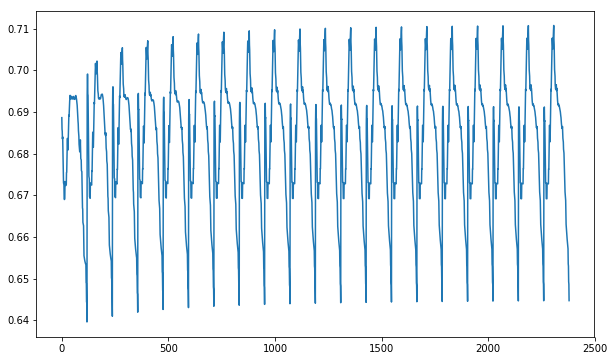

In [70]:
video_loss = []
model_classifier = classifier().cuda()
w=list(model_classifier.parameters())
print(w)
loss_fn = nn.BCELoss()
optimizer_classifier = torch.optim.Adam(model_classifier.parameters(),lr=0.01)
epochs = 20
model_video.train()
model_classifier.train()
for epoch in range(epochs):
    for i in range(119):
#         i = sample(range(15160),1)
#         i = i[0]
        
        optimizer_video.zero_grad()
        optimizer_classifier.zero_grad()
        
        logits = model_classifier(model_video(Train_video[i:i+128]))
        
        L = loss_fn(logits,Train_labels_happy[i:i+128])
        L.backward()
        video_loss.append(L.item())
        
#         optimizer_video.step()
        optimizer_classifier.step()
    print("Epoch :",epoch+1," loss :",L.item())
        
        
plt.plot(video_loss)
plt.show()

In [71]:
prediction = model_classifier(model_video(Test_video))
print(accuracy(prediction, Test_labels_happy))

52.19370722770691


In [114]:
w=list(model_classifier.parameters())
print(w)

[Parameter containing:
tensor([[ 0.0565, -0.0854, -0.0843,  ...,  0.1493, -0.0159, -0.0130],
        [-0.0535, -0.0033, -0.0352,  ..., -0.0703,  0.1189, -0.0729],
        [-0.0431, -0.0977,  0.0782,  ...,  0.1587,  0.0394, -0.1233],
        ...,
        [-0.1057, -0.0387, -0.0345,  ...,  0.1703, -0.1487,  0.1112],
        [-0.0872, -0.0022, -0.0492,  ..., -0.0605,  0.1352,  0.1422],
        [-0.1540, -0.0091, -0.1085,  ...,  0.0648, -0.0168, -0.0952]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.0236,  0.0882,  0.0831, -0.1374,  0.0258, -0.0687,  0.0590, -0.0639,
        -0.1580,  0.0846,  0.0363, -0.0313, -0.0091,  0.1031, -0.1573, -0.0325,
         0.1259, -0.1011, -0.0691,  0.0705, -0.1494,  0.1487, -0.0211, -0.0442,
        -0.0296, -0.0147, -0.1424, -0.1217,  0.0291,  0.1305, -0.0273, -0.1597],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.0005,  0.0003,  0.1099,  0.1341,  0.0103,  0.0781,  0.0166,  0.0399,
       

In [65]:
mc = classifier().cuda()


def accuracy(prediction,label):
    prediction = (prediction>0.5)
    acc = torch.sum(prediction==label.byte())
    return 100*(acc.float()/label.size()[0]).item()


prediction = mc(model_video(Test_video))
print("Video :",accuracy(prediction, Test_labels_happy))

prediction = mc(model_text(Test_text))
print("Text :",accuracy(prediction, Test_labels_happy))

Video : 52.19370722770691
Text : 52.19370722770691


In [57]:
print(model_video(Test_video))

tensor([[-0.0242, -0.2293, -0.2414,  ..., -0.1832, -0.3076,  0.0384],
        [-0.0258, -0.2285, -0.2395,  ..., -0.1849, -0.3082,  0.0405],
        [-0.0254, -0.2288, -0.2384,  ..., -0.1829, -0.3073,  0.0402],
        ...,
        [-0.0221, -0.2301, -0.2381,  ..., -0.1795, -0.3047,  0.0386],
        [-0.0244, -0.2285, -0.2363,  ..., -0.1821, -0.3077,  0.0379],
        [-0.0220, -0.2278, -0.2470,  ..., -0.1832, -0.3060,  0.0406]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [58]:
print(model_text(Test_text))

tensor([[-0.0135, -0.1435, -0.1817,  ..., -0.0968, -0.2304, -0.0034],
        [-0.0137, -0.1433, -0.1819,  ..., -0.0970, -0.2303, -0.0037],
        [-0.0134, -0.1435, -0.1819,  ..., -0.0970, -0.2303, -0.0033],
        ...,
        [-0.0136, -0.1435, -0.1818,  ..., -0.0969, -0.2304, -0.0034],
        [-0.0135, -0.1436, -0.1819,  ..., -0.0966, -0.2306, -0.0033],
        [-0.0137, -0.1430, -0.1824,  ..., -0.0970, -0.2304, -0.0039]],
       device='cuda:0', grad_fn=<AddmmBackward>)


[Parameter containing:
tensor([[ 0.1456,  0.0094,  0.0105,  ...,  0.1008,  0.0252,  0.1230],
        [-0.0054,  0.1329, -0.0910,  ..., -0.1247,  0.1097, -0.1520],
        [ 0.0711, -0.0658,  0.1095,  ..., -0.1390, -0.1604, -0.0162],
        ...,
        [ 0.1588,  0.0853, -0.0317,  ...,  0.0037, -0.1702, -0.1054],
        [-0.1667, -0.0770, -0.0966,  ..., -0.0805, -0.1398, -0.1186],
        [ 0.1506,  0.0512, -0.1290,  ..., -0.0500, -0.0784,  0.0767]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.1616, -0.0914,  0.0278, -0.1738,  0.0942, -0.0770, -0.0406,  0.1608,
        -0.1477,  0.0222,  0.1414, -0.0071,  0.1615,  0.0380, -0.0560, -0.0651,
         0.0935,  0.0274, -0.0066, -0.0835, -0.0947, -0.1667, -0.1694, -0.0942,
         0.1390,  0.0608, -0.0048,  0.0136,  0.0034,  0.1213, -0.0649, -0.0498],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.1478,  0.0413,  0.0563,  0.0348,  0.1495, -0.1537, -0.1305,  0.1494,
       

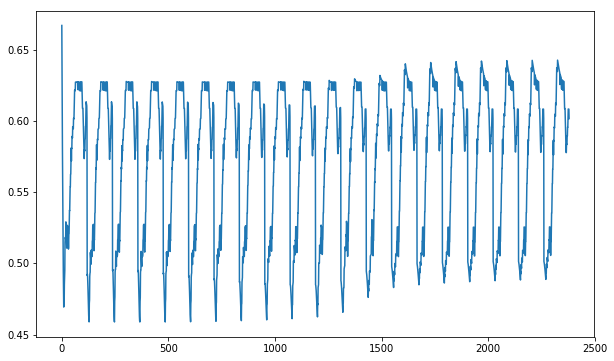

In [23]:
text_loss = []
model_classifier = classifier().cuda()
w=list(model_classifier.parameters())
print(w)
loss_fn = nn.BCELoss()
optimizer_classifier = torch.optim.Adam(model_classifier.parameters(),lr=0.01)
epochs = 20
model_text.train()
model_classifier.train()
for epoch in range(epochs):
    for i in range(119):
#         i = sample(range(15160),1)
#         i = i[0]
        
        optimizer_text.zero_grad()
        optimizer_classifier.zero_grad()
        
        logits = model_classifier(model_text(Train_text[i:i+128]))
        
        L = loss_fn(logits,Train_labels_sad[i:i+128])
        L.backward()
        text_loss.append(L.item())
        
        optimizer_text.step()
        optimizer_classifier.step()
    print("Epoch :",epoch+1," loss :",L.item())
        
        
plt.plot(text_loss)
plt.show()

In [24]:
prediction = model_classifier(model_text(Test_text))
print(accuracy(prediction, Test_labels_sad))

72.39238619804382


In [26]:
ta = model_classifier(model_video(Test_video))
print(ta)

tensor([[0.2986],
        [0.2986],
        [0.2986],
        ...,
        [0.2986],
        [0.2986],
        [0.2986]], device='cuda:0', grad_fn=<SigmoidBackward>)


In [27]:
mc = classifier().cuda()
tt = mc(model_text(Test_text))
for j in range(4832):
    print(tt[j].item())
print(torch.sum(tt==tt[0]))
print(accuracy(tt, Test_labels_sad))

0.5305561423301697
0.5305325388908386
0.5305495858192444
0.5305532813072205
0.5305520296096802
0.5305412411689758
0.5305505990982056
0.5305556058883667
0.5305342078208923
0.5305416584014893
0.530555009841919
0.5305655002593994
0.5305456519126892
0.5305352807044983
0.530558705329895
0.530530571937561
0.5305380821228027
0.5305488705635071
0.5305469036102295
0.5305503606796265
0.5305429100990295
0.5305252075195312
0.5305365324020386
0.5305479764938354
0.5305479168891907
0.5305379629135132
0.5305356979370117
0.5305376052856445
0.5305607914924622
0.5305584669113159
0.530547022819519
0.5305630564689636
0.5305492281913757
0.530540406703949
0.5305402874946594
0.530554473400116
0.530532956123352
0.5305426120758057
0.5305498242378235
0.5305423736572266
0.5305538177490234
0.5305507779121399
0.5305527448654175
0.5305569171905518
0.5305525064468384
0.5305479764938354
0.5305429100990295
0.5305215120315552
0.5305558443069458
0.5305372476577759
0.5305604934692383
0.5305365324020386
0.530546247959137
0

In [167]:
print(model_audio(Test_audio))

tensor([[ 0.1235, -0.4787,  0.2446,  ..., -0.1212, -0.0231, -0.0554],
        [ 0.1236, -0.4782,  0.2444,  ..., -0.1209, -0.0233, -0.0554],
        [ 0.1237, -0.4780,  0.2452,  ..., -0.1208, -0.0250, -0.0543],
        ...,
        [ 0.1357, -0.4848,  0.2536,  ..., -0.1264, -0.0324, -0.0465],
        [ 0.1253, -0.4790,  0.2472,  ..., -0.1219, -0.0251, -0.0524],
        [ 0.1231, -0.4779,  0.2450,  ..., -0.1206, -0.0241, -0.0545]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [168]:
print(model_text(Test_text))

tensor([[ 0.0763, -0.2856,  0.1034,  ..., -0.0602,  0.0036, -0.0082],
        [ 0.0763, -0.2858,  0.1036,  ..., -0.0602,  0.0036, -0.0083],
        [ 0.0763, -0.2857,  0.1035,  ..., -0.0601,  0.0036, -0.0082],
        ...,
        [ 0.0762, -0.2855,  0.1034,  ..., -0.0605,  0.0038, -0.0085],
        [ 0.0758, -0.2858,  0.1036,  ..., -0.0601,  0.0036, -0.0081],
        [ 0.0759, -0.2860,  0.1037,  ..., -0.0598,  0.0034, -0.0081]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [138]:
print(ta.shape,tt.shape)

torch.Size([4832, 32]) torch.Size([4832, 32])
